In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sqlite3

In [3]:
conn=sqlite3.connect(r"db\inventory.db")

In [4]:
tables=pd.read_sql_query("select name from sqlite_master WHERE type='table' ",conn)
tables

,name
0,begin_inventory
1,end_inventory
2,purchase_details
3,purchase_price_info
4,sales_info
5,vendor_invoice
6,Vendor_sales_summary


In [4]:
Vendor_sales_summary=pd.read_sql('''SELECT * FROM Vendor_sales_summary''',conn)

In [6]:
Vendor_sales_summary.describe().T

,count,mean,std,min,25%,50%,75%,max
VendorNumber,10691.0,10650.752221,18754.393269,2.00,3951.000,7153.00,9552.000,201359.00
Brand,10691.0,18039.478907,12662.752886,58.00,5792.000,18762.00,25514.500,90631.00
PurchasePrice,10691.0,24.378994,109.272538,0.36,6.840,10.45,19.470,5681.81
ActualPrice,10691.0,35.633630,148.249314,0.49,10.990,15.99,28.990,7499.99
TotalPurchaseQuantity,10691.0,3141.179310,11095.564477,1.00,36.000,262.00,1976.500,337660.00
TotalPurchaseDllars,10691.0,30109.492434,123073.215326,0.71,453.995,3655.70,20743.070,3811251.60
TotalSalesQuantity,10691.0,3077.759891,10953.324922,0.00,33.000,261.00,1929.500,334939.00
TotalSalesPrice,10691.0,18795.491028,44954.529189,0.00,289.710,2857.80,16064.835,672819.31
TotalSalesDollars,10691.0,42242.962187,167662.625503,0.00,729.270,5298.21,28399.960,5101919.51
TotalExciseTax,10691.0,1774.383797,10976.081158,0.00,4.800,46.59,418.820,368242.80


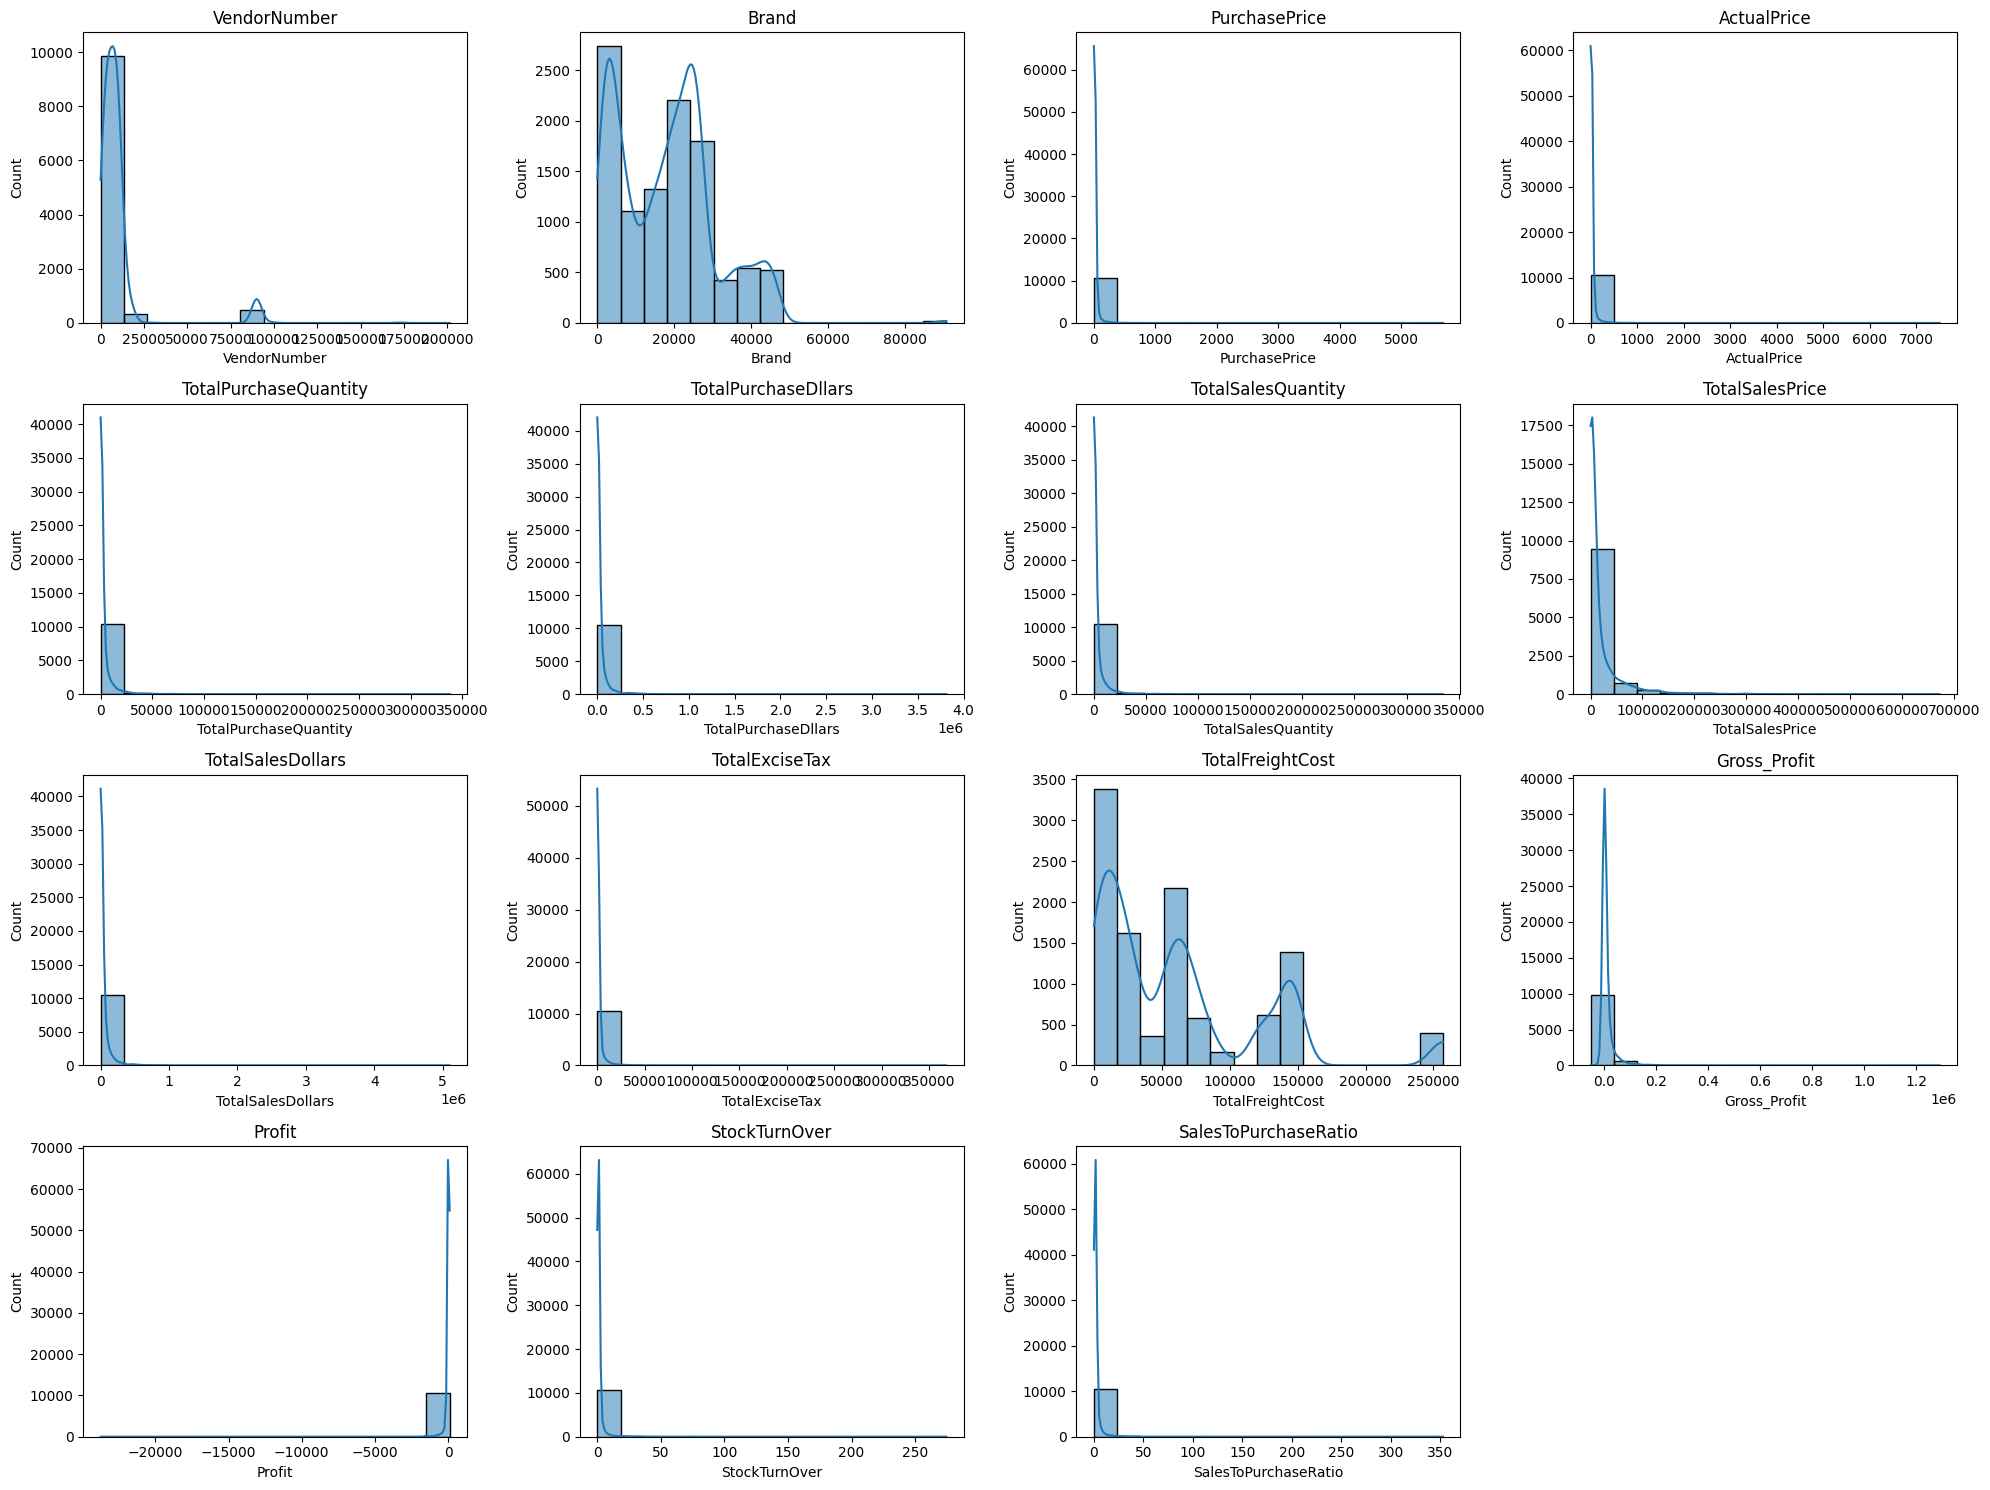

In [8]:
numerical_columns=Vendor_sales_summary.select_dtypes(include=np.number).columns
plt.figure(figsize=(20,15))
for i,col in enumerate(numerical_columns):
    plt.subplot(4,4,i+1)
    sns.histplot(Vendor_sales_summary[col],kde=True,bins=15)
    plt.title(col)
    plt.tight_layout()  

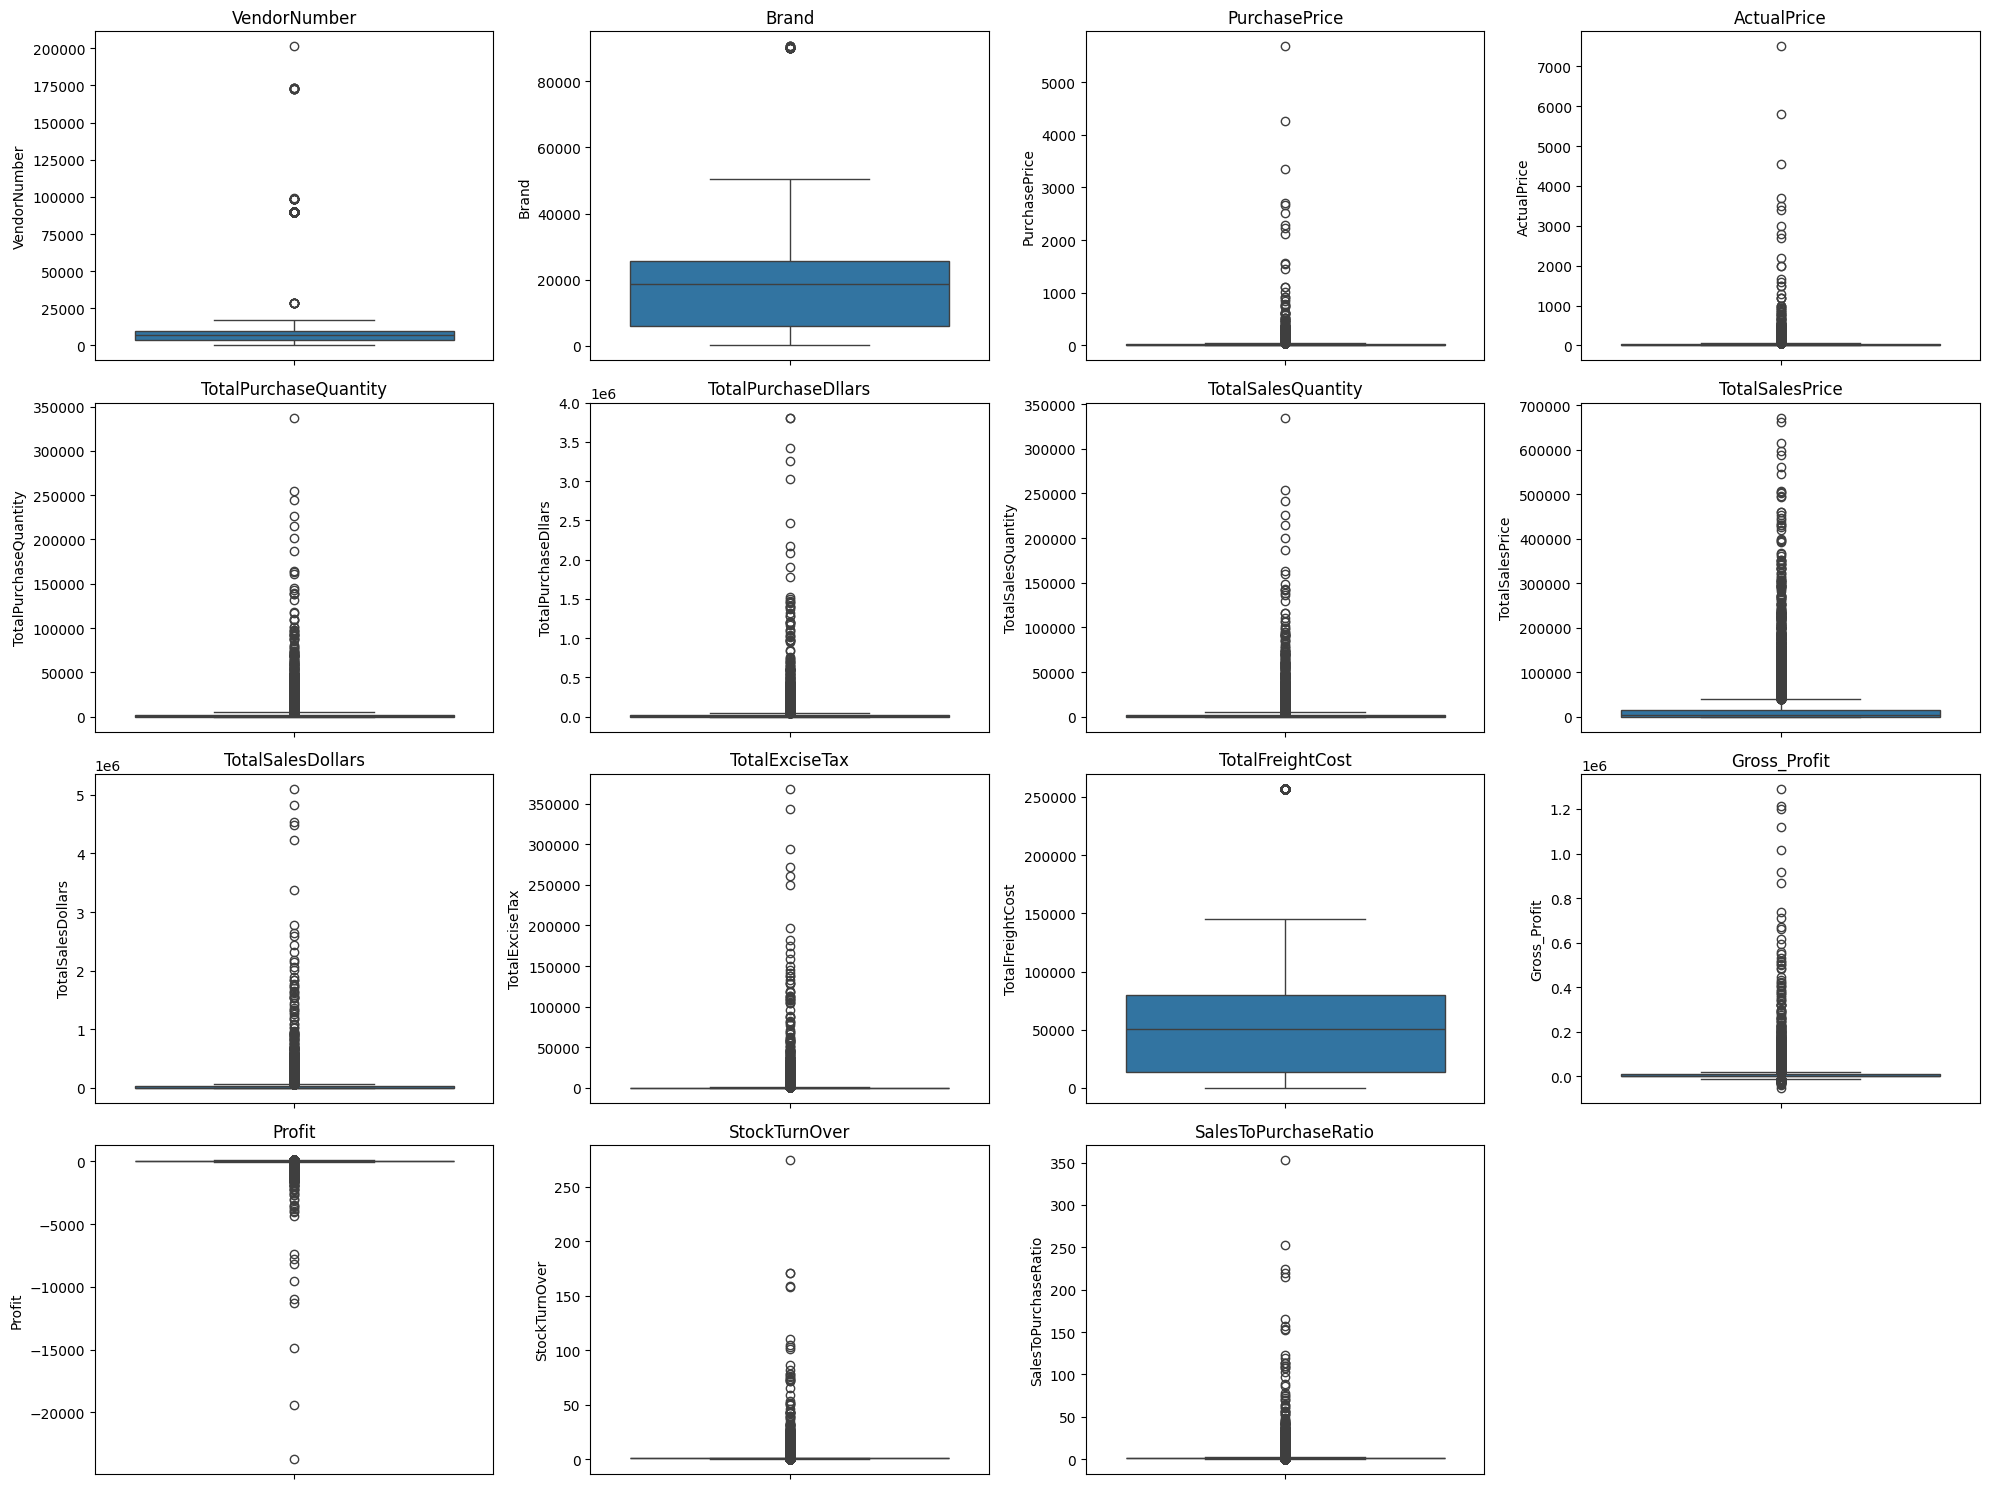

In [9]:
plt.figure(figsize=(20,15))
for i,col in enumerate(numerical_columns):
    plt.subplot(4,4,i+1)
    sns.boxplot(y=Vendor_sales_summary[col])
    plt.title(col)
    plt.tight_layout()  

In [134]:
### Taking data whcih has sales quantity >0
Vendor_sales_summary=pd.read_sql('''SELECT*
                                FROM Vendor_sales_summary
                                WHERE  TotalSalesQuantity>0''',conn)

In [11]:
Vendor_sales_summary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10513 entries, 0 to 10512
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   VendorNumber           10513 non-null  int64  
 1   VendorName             10513 non-null  object 
 2   Brand                  10513 non-null  int64  
 3   Description            10513 non-null  object 
 4   PurchasePrice          10513 non-null  float64
 5   ActualPrice            10513 non-null  float64
 6   Volume                 10513 non-null  object 
 7   TotalPurchaseQuantity  10513 non-null  int64  
 8   TotalPurchaseDllars    10513 non-null  float64
 9   TotalSalesQuantity     10513 non-null  float64
 10  TotalSalesPrice        10513 non-null  float64
 11  TotalSalesDollars      10513 non-null  float64
 12  TotalExciseTax         10513 non-null  float64
 13  TotalFreightCost       10513 non-null  float64
 14  Gross_Profit           10513 non-null  float64
 15  Pr

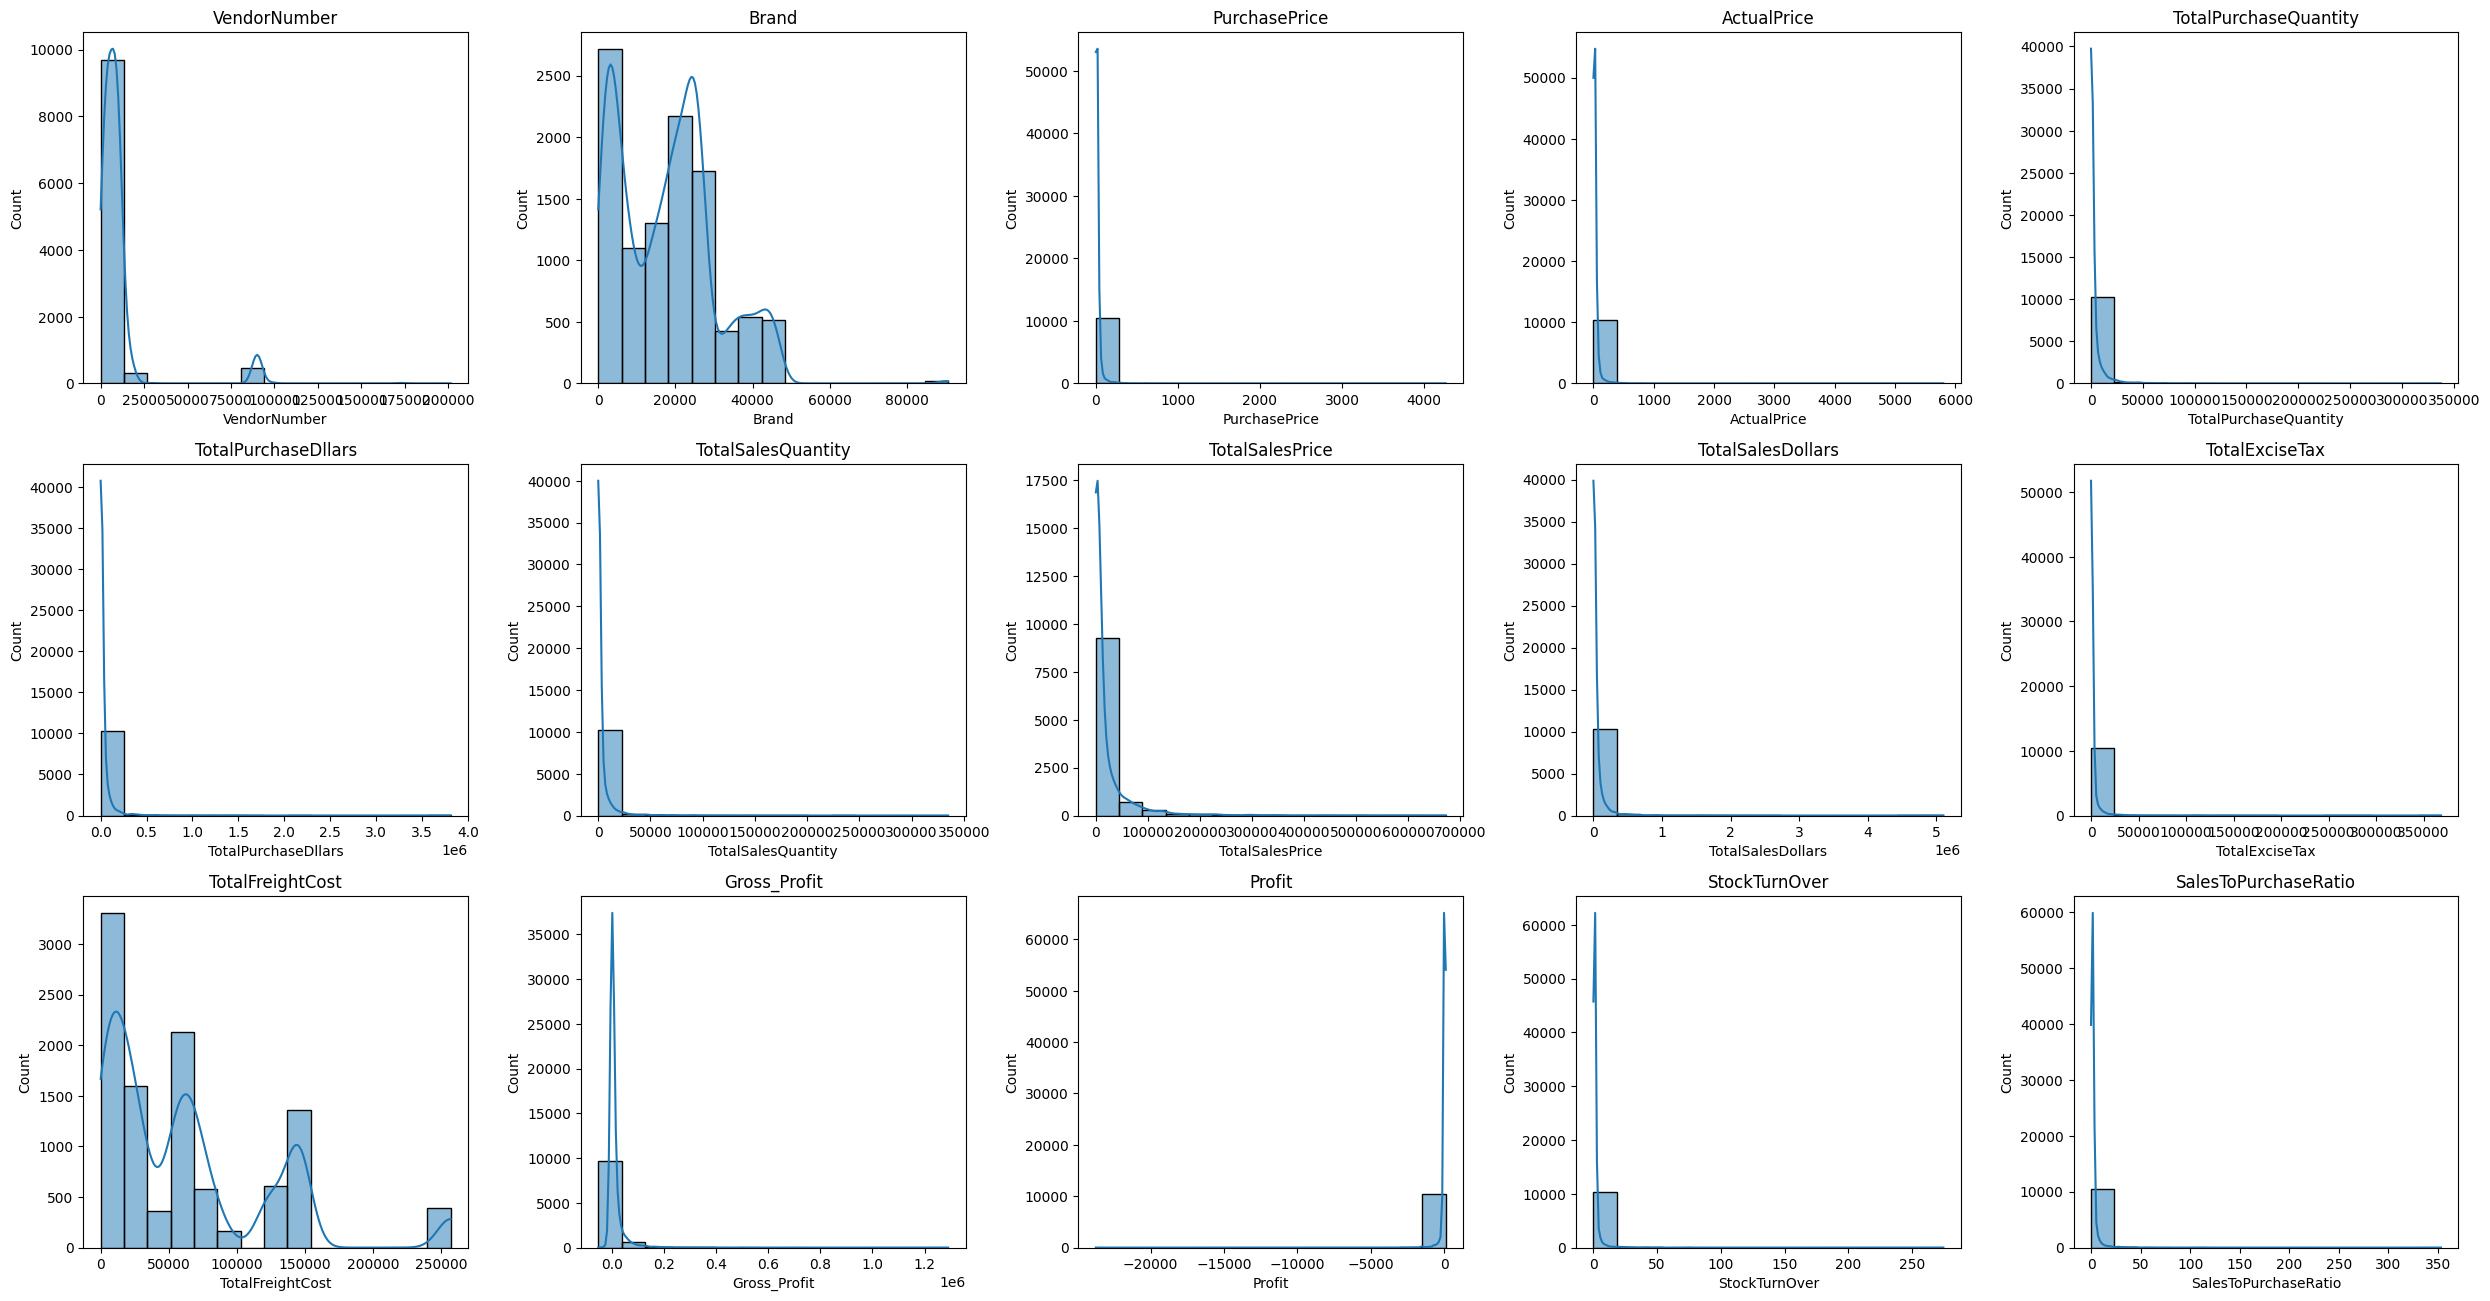

In [12]:
numerical_columns=Vendor_sales_summary.select_dtypes(include=np.number).columns
plt.figure(figsize=(25,17))
for i,col in enumerate(numerical_columns):
    plt.subplot(4,5,i+1)
    sns.histplot(Vendor_sales_summary[col],kde=True,bins=15)
    plt.title(col)
    plt.tight_layout()  

<Figure size 1200x500 with 0 Axes>

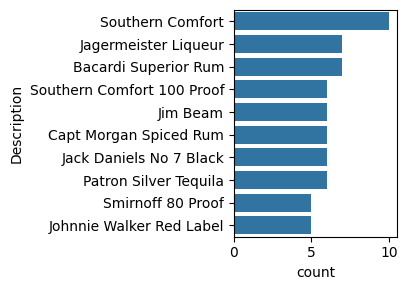

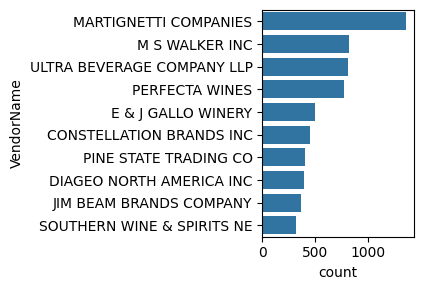

In [13]:
plt.figure(figsize=(12,5))
for i,col in enumerate(["Description","VendorName"]):
    plt.figure(figsize=(6,3))
    plt.subplot(1,2,i+1)
    sns.countplot(y=Vendor_sales_summary[col],order=Vendor_sales_summary[col].value_counts().index[:10])
    plt.tight_layout()

Text(0.5, 1.0, 'Correlation Matrix')

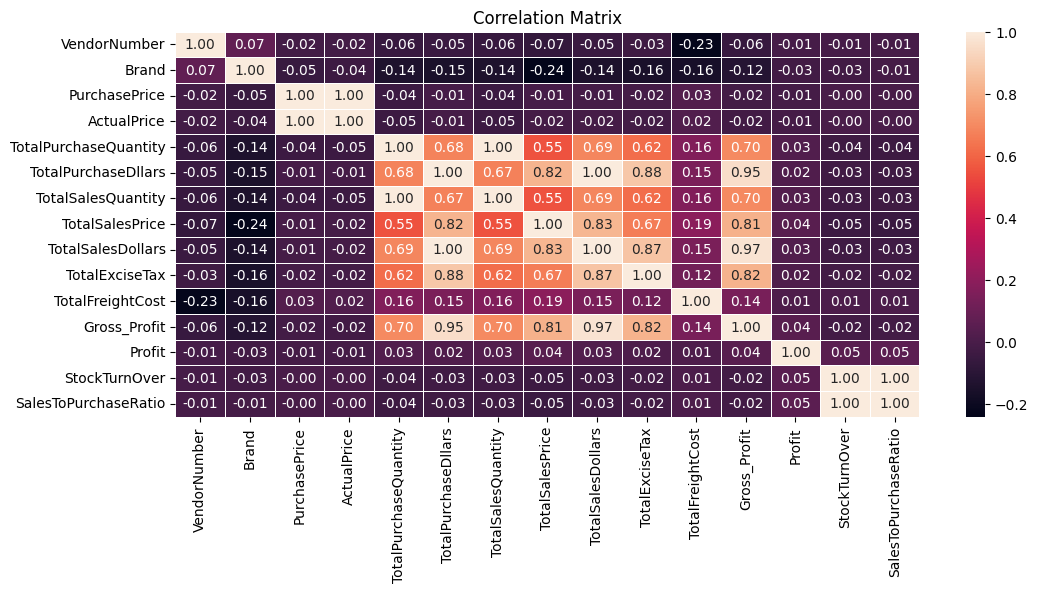

In [14]:
plt.figure(figsize=(12,5))
sns.heatmap(Vendor_sales_summary[numerical_columns].corr(),annot=True,fmt='.2f',cmap="rocket",linewidths=0.5)
plt.title("Correlation Matrix")

### Data Analysis for all data profit and loss combined

### 1. Identify the brands that needs promotional or pricing adjustments which exhibit lowe sales performance and higher profit margin

In [117]:
brand_performance=Vendor_sales_summary.groupby(["Description"]).agg({"TotalSalesDollars":"sum","Profit":"mean"}).reset_index()      

In [118]:
low_threshold=Vendor_sales_summary["TotalSalesDollars"].quantile(0.30)

In [119]:
low_threshold

np.float64(1199.46)

In [120]:
high_threshold=Vendor_sales_summary["Profit"].quantile(0.85)

In [121]:
high_threshold

np.float64(54.941999999999986)

In [122]:
target_brands=brand_performance[(brand_performance["TotalSalesDollars"]<=low_threshold) & (brand_performance["Profit"]>=high_threshold)].sort_values(by="TotalSalesDollars",ascending=False)

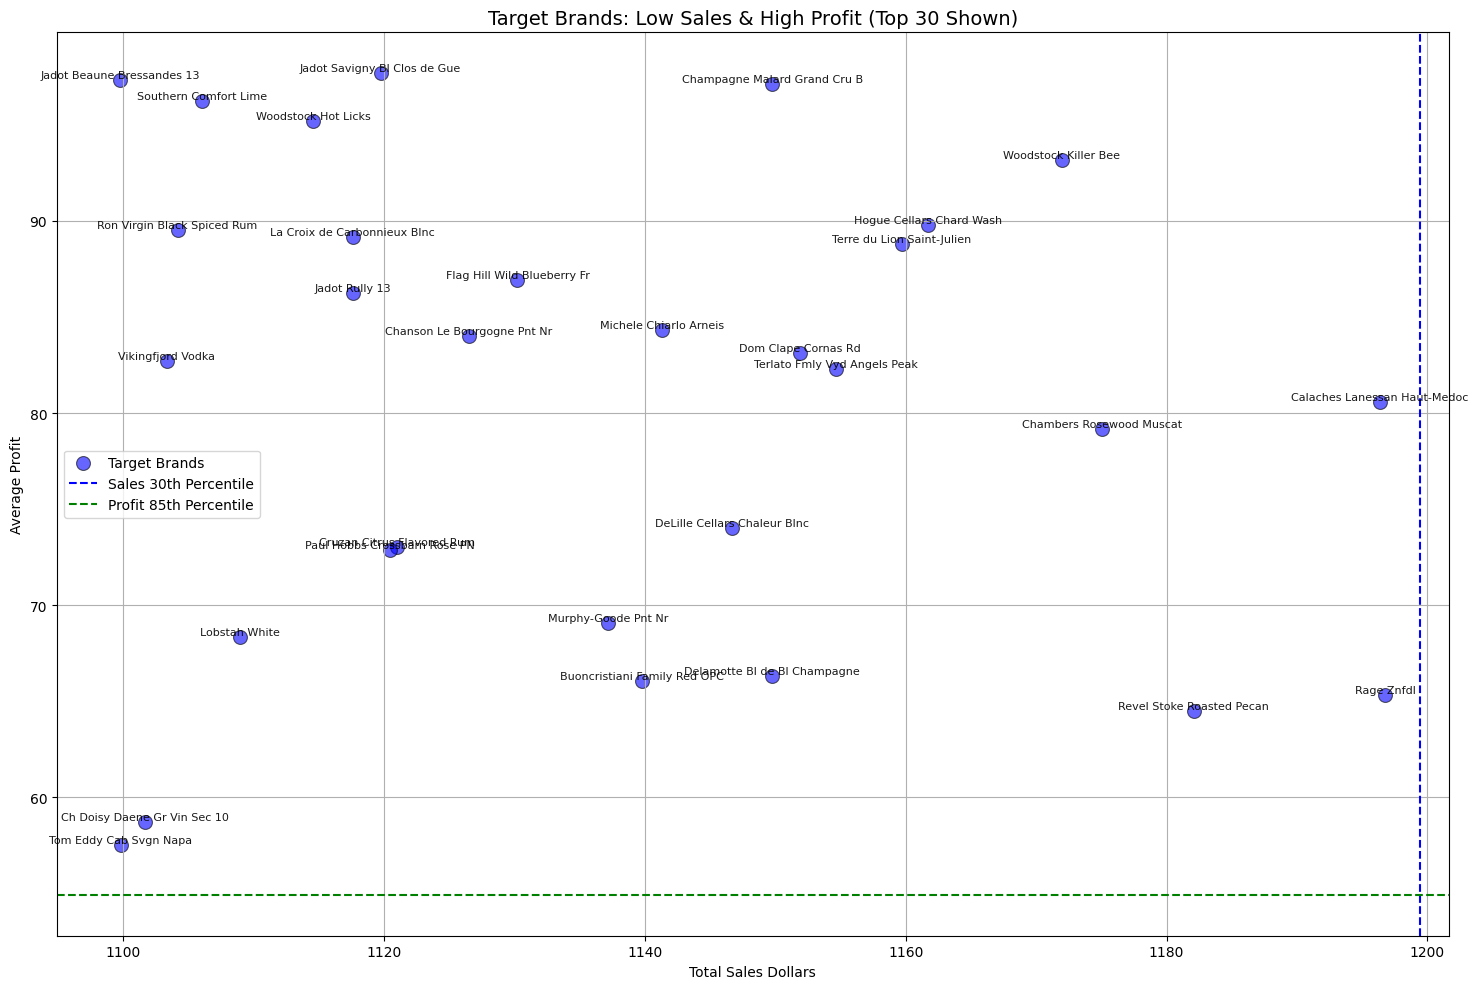

In [123]:
plt.figure(figsize=(15,10))

# Scatter plot for target brands
sns.scatterplot(
    data=target_brands[:30],
    x="TotalSalesDollars",
    y="Profit",
    label="Target Brands",
    alpha=0.6,
    s=100,
    edgecolor="black",
    color="blue"
)

# Annotate each point with its Description
for _, row in target_brands[:30].iterrows():
    plt.text(row["TotalSalesDollars"], row["Profit"], row["Description"],
             fontsize=8, ha='center', va='bottom', color='black', alpha=0.9)

# Threshold lines
plt.axvline(low_threshold, color='blue', linestyle='--', label='Sales 30th Percentile')
plt.axhline(high_threshold, color='green', linestyle='--', label='Profit 85th Percentile')

# Final plot adjustments
plt.title("Target Brands: Low Sales & High Profit (Top 30 Shown)", fontsize=14)
plt.xlabel("Total Sales Dollars")
plt.ylabel("Average Profit")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

### 2.Which Vendors and brands demonstrate the highest sales performace

In [188]:
def to_format_dollars(value):
    if value>=1000000:
        res=str(round(value/1000000,2))+"M"
        return res
    if value>=1000:
        res=str(round(value/1000,2))+"K"
        return res
    

In [99]:
top_vendors = Vendor_sales_summary.groupby("VendorName")["TotalSalesDollars"].sum().nlargest(10)
top_vendors=top_vendors.reset_index()
top_brands = Vendor_sales_summary.groupby("Description")["TotalSalesDollars"].sum().nlargest(10)
top_brands=top_brands.reset_index()

In [97]:
import warnings
warnings.filterwarnings("ignore")

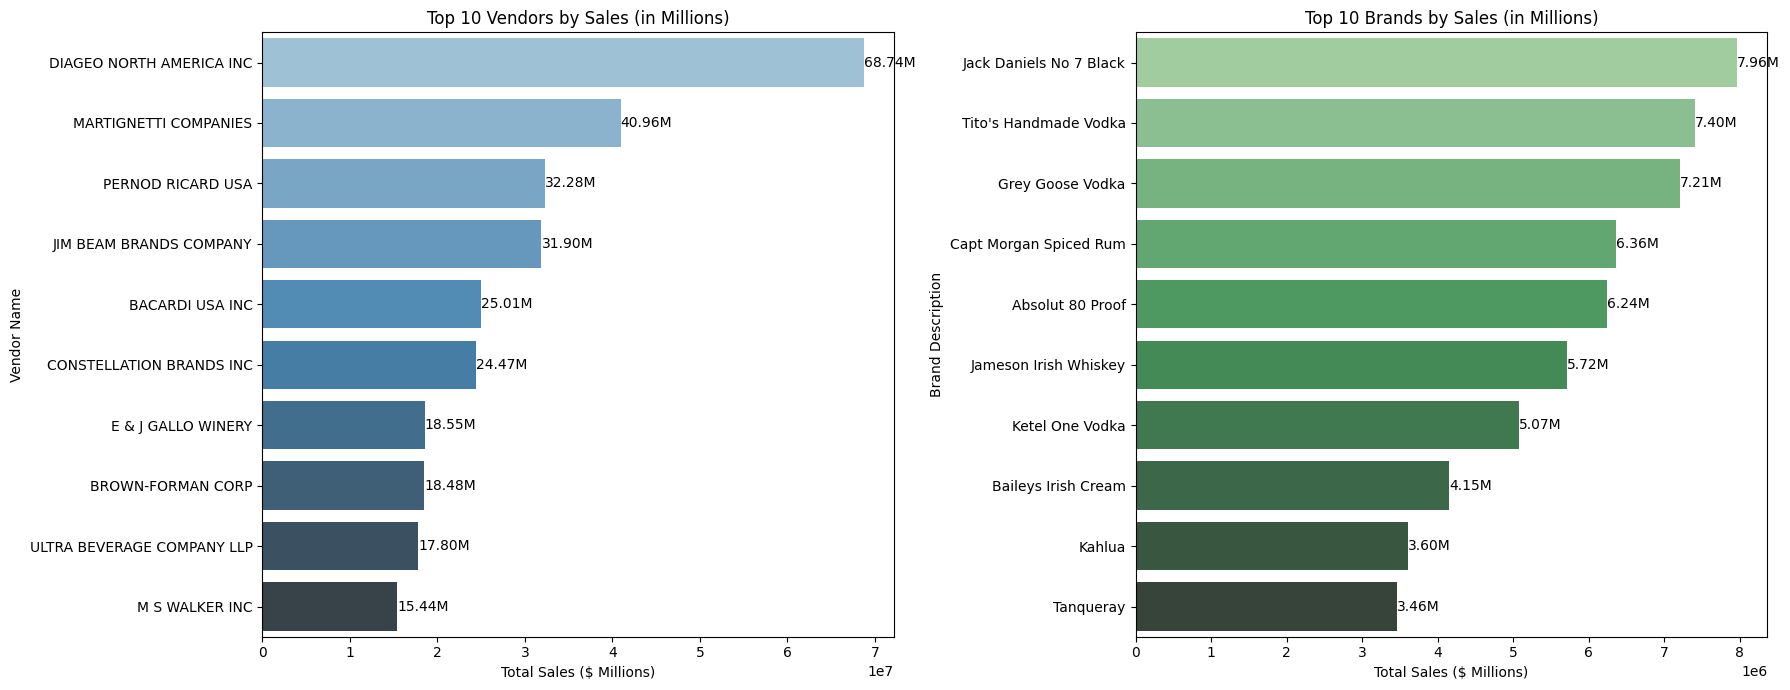

In [98]:
fig, axes = plt.subplots(1, 2, figsize=(18, 7), sharey=False)

sns.barplot(
    data=top_vendors,
    y="VendorName",
    x="TotalSalesDollars",
    ax=axes[0],
    palette="Blues_d"
)
axes[0].set_title("Top 10 Vendors by Sales (in Millions)")
axes[0].set_xlabel("Total Sales ($ Millions)")
axes[0].set_ylabel("Vendor Name")

for i, v in enumerate(top_vendors["TotalSalesDollars"]):
    axes[0].text(v + 0.1, i, f"{v/1000000:.2f}M", color='black', va='center')

sns.barplot(
    data=top_brands,
    y="Description",
    x="TotalSalesDollars",
    ax=axes[1],
    palette="Greens_d"
)
axes[1].set_title("Top 10 Brands by Sales (in Millions)")
axes[1].set_xlabel("Total Sales ($ Millions)")
axes[1].set_ylabel("Brand Description")

for i, v in enumerate(top_brands["TotalSalesDollars"]):
    axes[1].text(v + 0.1, i, f"{v/1000000:.2f}M", color='black',va='center')

plt.tight_layout()
plt.show()


### 3. Which Vendors contribute the most to the totalpurchasedollars

In [167]:
Vendor_sales_summary=pd.read_sql('''SELECT*
                                FROM Vendor_sales_summary
                                WHERE  TotalSalesQuantity>0''',conn)

In [136]:
vendor_purchase_con=Vendor_sales_summary.groupby("VendorName")["TotalPurchaseDllars"].sum().sort_values(ascending=False).reset_index()

In [137]:
vendor_purchase_con["Purchase_con_%"]=round(vendor_purchase_con["TotalPurchaseDllars"]*100/vendor_purchase_con["TotalPurchaseDllars"].sum(),2)

In [138]:
top_10_con=vendor_purchase_con[:10]
top_10_con['RollingPercent'] = round(top_10_con['TotalPurchaseDllars'].cumsum() / top_10_con['TotalPurchaseDllars'].sum() * 100,2)
top_10_con["TotalPurchaseDllars"]=top_10_con["TotalPurchaseDllars"].apply(lambda x:to_format_dollars(x))
top_10_con

,VendorName,TotalPurchaseDllars,Purchase_con_%,RollingPercent
0,DIAGEO NORTH AMERICA INC,50.96M,15.84,24.26
1,MARTIGNETTI COMPANIES,27.82M,8.65,37.50
2,JIM BEAM BRANDS COMPANY,24.2M,7.53,49.02
3,PERNOD RICARD USA,24.12M,7.50,60.50
4,BACARDI USA INC,17.62M,5.48,68.89
5,CONSTELLATION BRANDS INC,15.57M,4.84,76.30
6,BROWN-FORMAN CORP,13.53M,4.21,82.74
7,ULTRA BEVERAGE COMPANY LLP,13.1M,4.07,88.97
8,E & J GALLO WINERY,12.29M,3.82,94.82
9,M S WALKER INC,10.88M,3.38,100.00


In [139]:
vendor_purchase_con[:10]["Purchase_con_%"].sum() # top 10 vendors contribution in total 100%

np.float64(65.32000000000001)

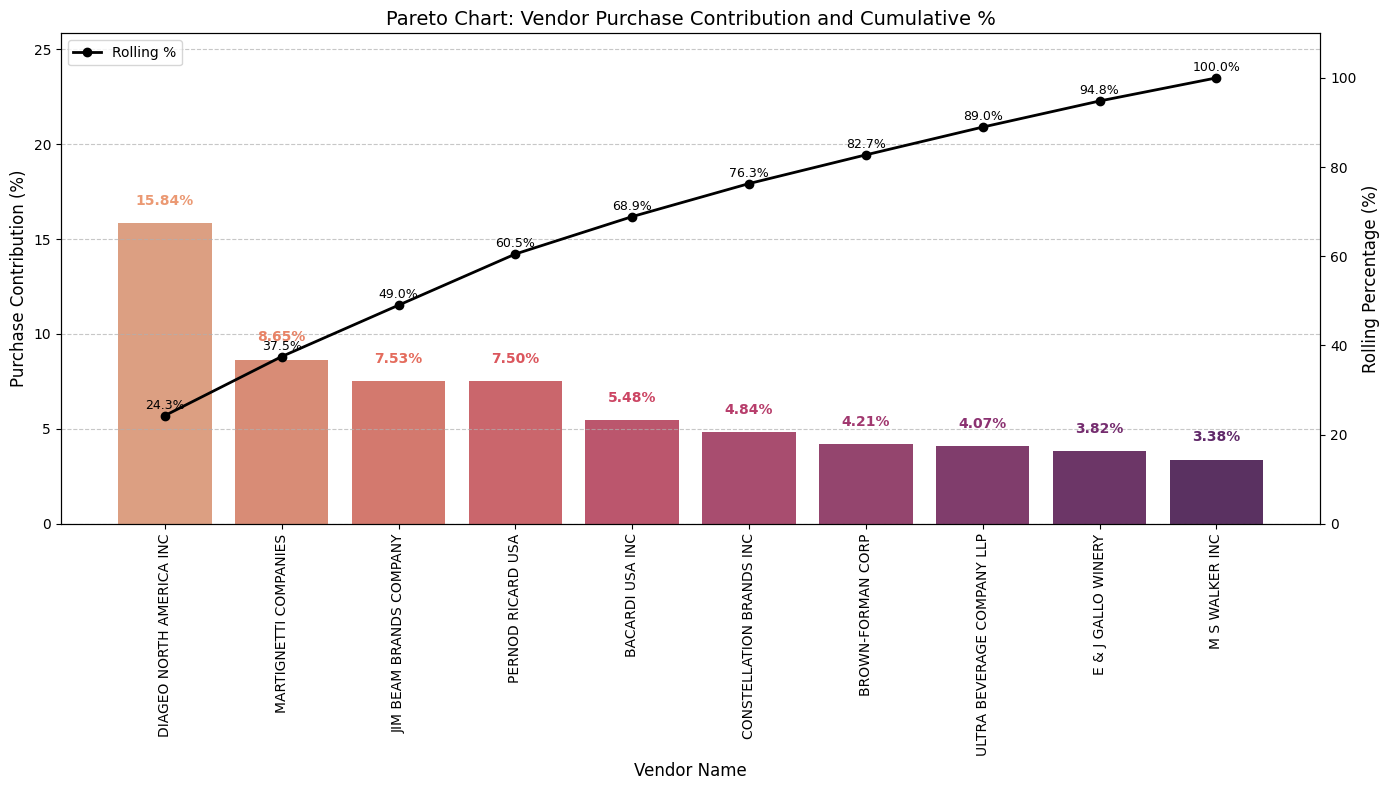

In [140]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

df = top_10_con.copy()

palette = sns.color_palette("flare", len(df))

# Plot setup
fig, ax1 = plt.subplots(figsize=(14, 8))

sns.barplot(
    data=df,
    x="VendorName",
    y="Purchase_con_%",
    ax=ax1,
    palette=palette
)
ax1.set_ylabel("Purchase Contribution (%)", fontsize=12)
ax1.set_xlabel("Vendor Name", fontsize=12)
ax1.tick_params(axis='x', rotation=90)
ax1.set_ylim(0, max(df["Purchase_con_%"]) + 10)

for i, (value, name) in enumerate(zip(df["Purchase_con_%"], df["VendorName"])):
    ax1.text(i, value + 0.8, f"{value:.2f}%", ha='center', va='bottom', fontsize=10, fontweight='bold', color=palette[i])

ax2 = ax1.twinx()
ax2.plot(df["VendorName"], df["RollingPercent"], color="black", marker="o", linewidth=2, label="Rolling %")
ax2.set_ylabel("Rolling Percentage (%)", fontsize=12)
ax2.set_ylim(0, 110)

for i, cp in enumerate(df["RollingPercent"]):
    ax2.text(i, cp + 1.5, f"{cp:.1f}%", ha='center', fontsize=9, color='black')

ax1.grid(axis='y', linestyle='--', alpha=0.7)
plt.title("Pareto Chart: Vendor Purchase Contribution and Cumulative %", fontsize=14)
ax2.legend(loc="upper left")

plt.tight_layout()
plt.show()

In [141]:
### Data Visualization Top 10 vendors contribution to totalpurchasedollars and others using Donutchart

In [142]:
Vendor_sales_summary.groupby("VendorName")["TotalPurchaseDllars"].sum().sort_values(ascending=False)[:10].sum()

np.float64(210092967.12999997)

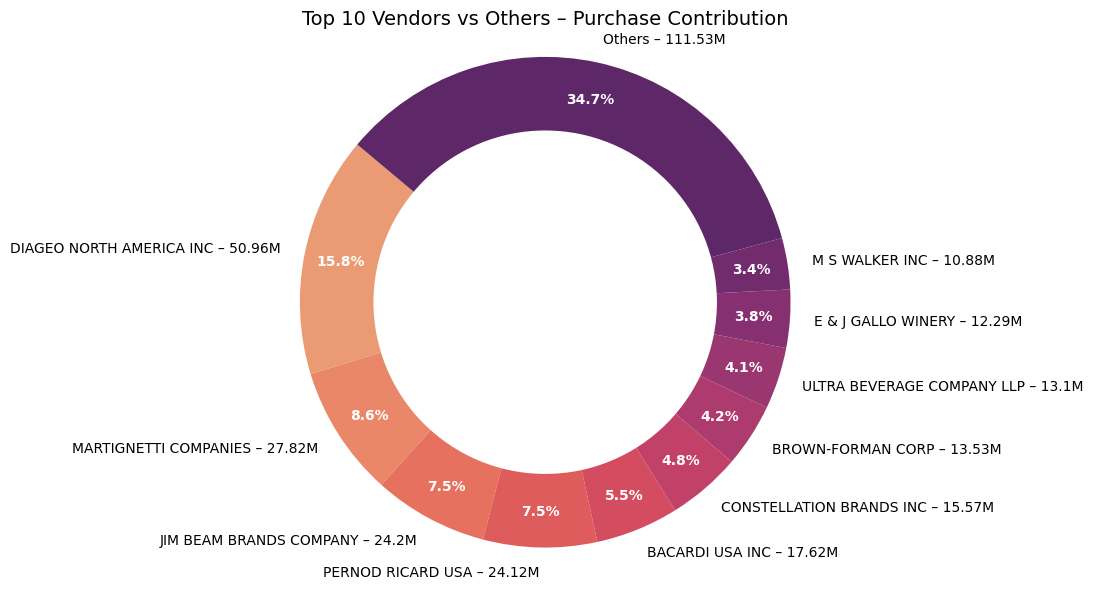

In [143]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df_top10 = top_10_con.copy()


others_purchase = str(round((Vendor_sales_summary["TotalPurchaseDllars"].
                             sum()-Vendor_sales_summary.groupby("VendorName")["TotalPurchaseDllars"].sum()
                             .sort_values(ascending=False)[:10].sum())/ 1_000_000, 2)) + "M"
others_percent = 100 - df_top10["Purchase_con_%"].sum()


others_row = pd.DataFrame({
    "VendorName": ["Others"],
    "TotalPurchaseDllars": [others_purchase],
    "Purchase_con_%": [others_percent]
})


df_donut = pd.concat(
    [df_top10[["VendorName", "TotalPurchaseDllars", "Purchase_con_%"]], others_row],
    ignore_index=True
)

df_donut["Label"] = df_donut.apply(
    lambda row: f"{row['VendorName']} – {row['TotalPurchaseDllars']}", axis=1
)

# Plotting
plt.figure(figsize=(10,6))
colors = sns.color_palette("flare", len(df_donut))

wedges, texts, autotexts = plt.pie(
    df_donut["Purchase_con_%"],
    labels=df_donut["Label"],
    autopct="%.1f%%",         
    startangle=140,
    colors=colors,
    pctdistance=0.85,          
    wedgeprops=dict(width=0.4)
)

for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontsize(10)
    autotext.set_fontweight('bold')

centre_circle = plt.Circle((0, 0), 0.70, fc='white')
plt.gca().add_artist(centre_circle)

plt.title("Top 10 Vendors vs Others – Purchase Contribution", fontsize=14)
plt.axis('equal')
plt.tight_layout()
plt.show()


### 4.Does purchasing in bulk reduce the unit price,and what is the optimal purchase volume for cost savings

In [144]:
Vendor_sales_summary.head()

,VendorNumber,VendorName,Brand,Description,PurchasePrice,ActualPrice,Volume,TotalPurchaseQuantity,TotalPurchaseDllars,TotalSalesQuantity,TotalSalesPrice,TotalSalesDollars,TotalExciseTax,TotalFreightCost,Gross_Profit,Profit,StockTurnOver,SalesToPurchaseRatio
0,1128,BROWN-FORMAN CORP,1233,Jack Daniels No 7 Black,26.27,36.99,1750,145080,3811251.60,142049.0,672819.31,5101919.51,260999.20,68601.68,1290667.91,25.30,0.98,1.34
1,4425,MARTIGNETTI COMPANIES,3405,Tito's Handmade Vodka,23.19,28.99,1750,164038,3804041.22,160247.0,561512.37,4819073.49,294438.66,144929.24,1015032.27,21.06,0.98,1.27
2,17035,PERNOD RICARD USA,8068,Absolut 80 Proof,18.24,24.99,1750,187407,3418303.68,187140.0,461140.15,4538120.60,343854.07,123780.22,1119816.92,24.68,1.00,1.33
3,3960,DIAGEO NORTH AMERICA INC,4261,Capt Morgan Spiced Rum,16.17,22.99,1750,201682,3261197.94,200412.0,420050.01,4475972.88,368242.80,257032.07,1214774.94,27.14,0.99,1.37
4,3960,DIAGEO NORTH AMERICA INC,3545,Ketel One Vodka,21.89,29.99,1750,138109,3023206.01,135838.0,545778.28,4223107.62,249587.83,257032.07,1199901.61,28.41,0.98,1.40


In [145]:
### In the data we have already Unit Price details in Purchase_price_column

In [146]:
 Vendor_sales_summary["Order_Size"]=pd.qcut(Vendor_sales_summary["TotalPurchaseQuantity"],q=3,labels=["Small","Medium","Large"])

In [147]:
Vendor_sales_summary.groupby("Order_Size")[["PurchasePrice"]].mean()

,PurchasePrice
Order_Size,
Small,41.070955
Medium,17.882941
Large,11.225070


In [148]:
### we can observe that Large Order Size get the lowest unit price 11.3 meaning higher margins if they can manage inventory and sales efficiently

Text(0.5, 1.0, 'Impact of Bulk Purchase on UnitPirce')

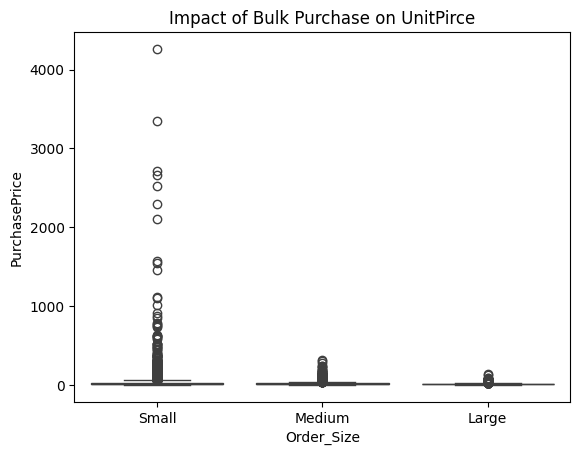

In [149]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(data=Vendor_sales_summary, x="Order_Size", y="PurchasePrice")
plt.title("Impact of Bulk Purchase on UnitPirce")

### 5.Which Vendors have low inventory turnover,indicating excess stock ans slow moving products

In [160]:
### Filtering inventory turnover <1, and has profit and higher than means products are moving fast

In [158]:
inv_turn_info=Vendor_sales_summary[(Vendor_sales_summary["StockTurnOver"]<1) & (Vendor_sales_summary["Profit"]>1)]

In [164]:
# Top 10 vendors who had slow moving products and lo conversion
inv_turn_info.groupby("VendorName")["StockTurnOver"].mean().nsmallest(10).reset_index()

,VendorName,StockTurnOver
0,ALISA CARR BEVERAGES,0.620000
1,HIGHLAND WINE MERCHANTS LLC,0.710000
2,PARK STREET IMPORTS LLC,0.750000
3,KLIN SPIRITS LLC,0.760000
4,Circa Wines,0.761667
5,CENTEUR IMPORTS LLC,0.772500
6,SMOKY QUARTZ DISTILLERY LLC,0.780000
7,Dunn Wine Brokers,0.781429
8,TAMWORTH DISTILLING,0.800000
9,THE IMPORTED GRAPE LLC,0.808182


### 6.How much capital is locked in unsold  inventory per vendor , and which vendors  contribute the most to it

In [170]:
Vendor_sales_summary=pd.read_sql('''SELECT*
                                FROM Vendor_sales_summary
                                ''',conn)

In [172]:
Vendor_sales_summary["Unsold_capital"]=(Vendor_sales_summary["TotalPurchaseQuantity"]-Vendor_sales_summary["TotalSalesQuantity"])*Vendor_sales_summary["PurchasePrice"]

In [186]:
Vendor_sales_summary[Vendor_sales_summary["Unsold_capital"]<0].groupby("VendorName")["Unsold_capital"].sum().nsmallest(10)

VendorName
MARTIGNETTI COMPANIES        -999358.34
ULTRA BEVERAGE COMPANY LLP   -695733.16
DIAGEO NORTH AMERICA INC     -676389.71
BACARDI USA INC              -507793.09
M S WALKER INC               -379572.44
PERFECTA WINES               -343837.08
JIM BEAM BRANDS COMPANY      -278685.25
CONSTELLATION BRANDS INC     -212785.46
SOUTHERN WINE & SPIRITS NE   -190425.15
MOET HENNESSY USA INC        -184397.48
Name: Unsold_capital, dtype: float64

In [198]:
total_unsold_capital=Vendor_sales_summary[Vendor_sales_summary["Unsold_capital"]<0]["Unsold_capital"].sum()
print("Total unsold capital was",str(round(abs(total_unsold_capital)/1000000,2))+"M")

Total unsold capital was 6.85M
